In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
import pandas as pd
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.affinity import rotate
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

# Octagons (4.8.8)

In [3]:
d = 400
tile_unit = TileUnit(tiling_type = "archimedean", code = "4.8.8",
                     spacing = d, crs = ak.crs)

<AxesSubplot:>

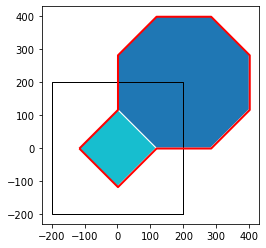

In [4]:
ax = tile_unit.elements.plot(column = "element_id", edgecolor = "w")
tile_unit.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")
tile_unit.regularised_tile.plot(
    ax = ax, edgecolor = "r", facecolor = "#00000000", linewidth = 2)

In [5]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")

In [6]:
t = tiling.get_tiled_map(prioritise_tiles = True)

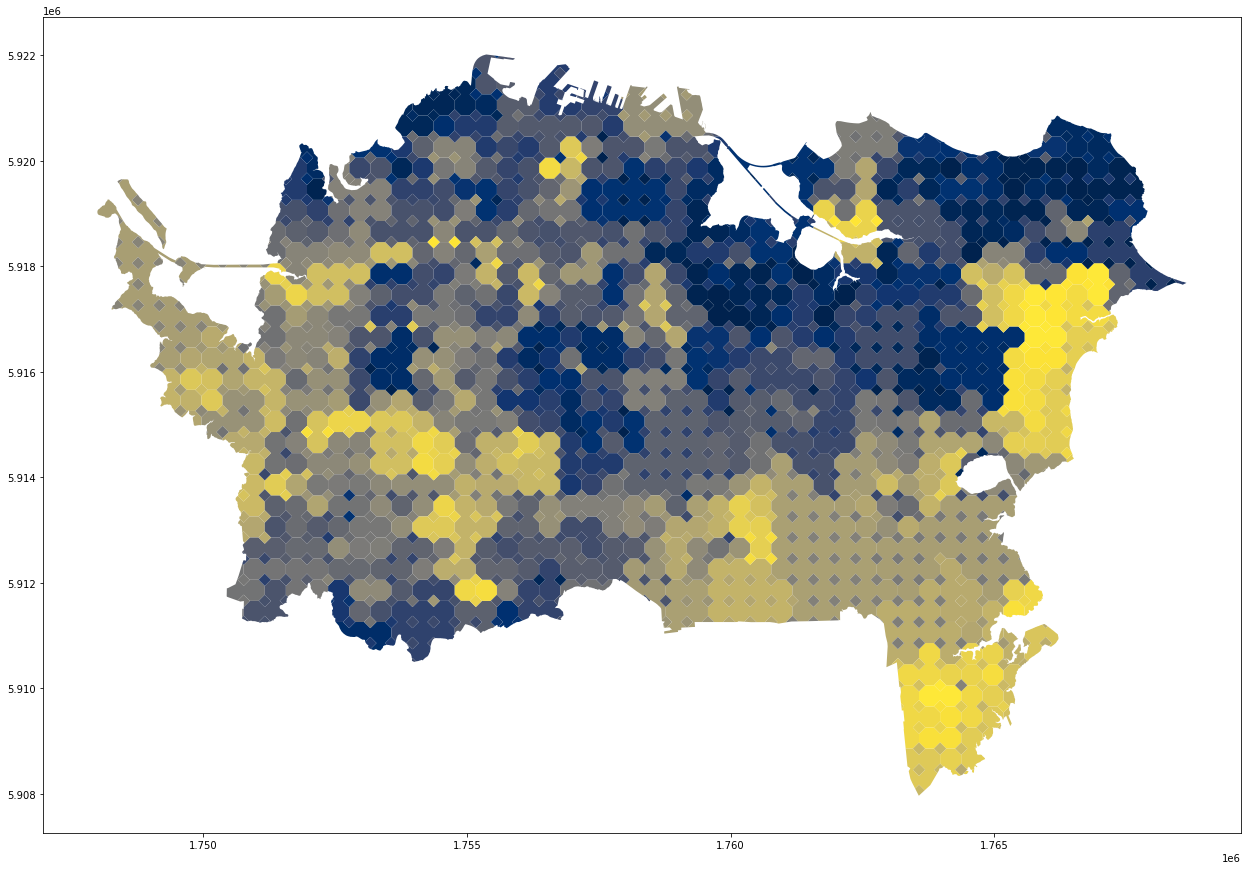

In [7]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#006633", linewidth = 0)

strands = pd.Series.unique(t.element_id)
cols = [x for x in t.columns if "Rank" in x]
cmaps = ["cividis"] * 8

for strand, col, cmap in zip(strands, cols, cmaps):
    t[t.element_id == strand].plot(ax = ax, column = col, cmap = cmap, k = 100, scheme = "equal_interval", linewidth = 0)

In [8]:
t.explore(tooltip = False)